# **TASK 1 : Prediction using Supervised ML**

**The goal is to predict students' percentage of marks based on the number of hours they studied.**

**Author: Deep Navagamiya**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data form source
data_import = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data_import.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data_import.isnull == True

False

As we do not find any null value in data we will now visualize the data.

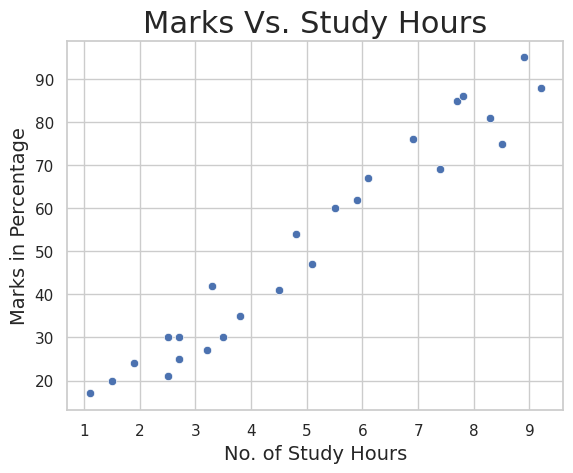

In [4]:
sns.set(style='whitegrid')
sns.scatterplot(x='Hours', y='Scores', data=data_import)
plt.title('Marks Vs. Study Hours', fontsize=22)
plt.xlabel('No. of Study Hours', fontsize=14)
plt.ylabel('Marks in Percentage', fontsize=14)
plt.show()

Based on the scatter plot shown above, it appears that there is a correlation between 'Marks in Percentage' and 'No. of Study Hours.' To confirm this correlation, let's go ahead and plot a regression line.

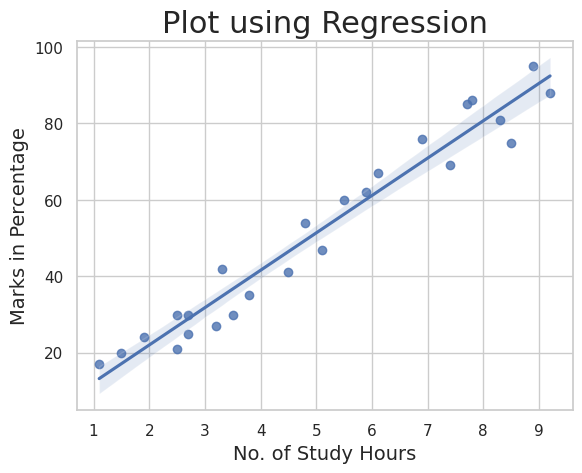

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x='Hours', y='Scores', data=data_import)
plt.title('Plot using Regression', fontsize=22)
plt.xlabel('No. of Study Hours', fontsize=14)
plt.ylabel('Marks in Percentage', fontsize=14)
plt.show()
correlation_matrix = data_import.corr()
print(correlation_matrix)

We have confirmed that the variables exhibit a positive correlation.

# Training Model

1. Split the data

In [6]:
# Define X and y from the Data
X = data_import.drop(columns=['Scores']).values
y = data_import['Scores'].values

# Split the Data into two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

2. Incorporating the Data into the Model

In [7]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# Forecasting the Percentage of Marks

In [9]:
# Make predictions using the trained regression model
predict_y = regression.predict(val_X)

# Create a DataFrame to display the predictions
prediction = pd.DataFrame({'Hours': val_X[:, 0], 'Predicted Marks': predict_y})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [10]:
# Create a DataFrame to compare actual and predicted marks
comparison_df = pd.DataFrame({'Actual_Marks': val_y, 'Predicted_Marks': predict_y})
comparison_df

,Actual_Marks,Predicted_Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visual Assessment of Predicted Marks Against Actual Marks

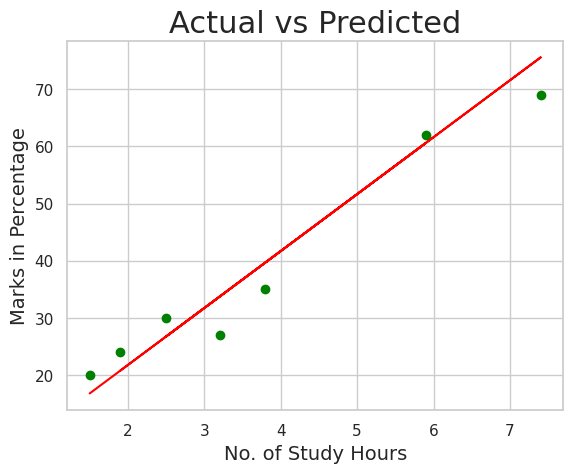

In [11]:
# Scatter plot for actual data points
plt.scatter(x=val_X, y=val_y, color='green')

# Line plot for predicted data points
plt.plot(val_X, predict_y, color='red')

# Customize the plot
plt.title('Actual vs Predicted', fontsize=22)
plt.xlabel('No. of Study Hours', fontsize=14)
plt.ylabel('Marks in Percentage', fontsize=14)

# Display the plot
plt.show()

**Assessing the Model**

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,predict_y))

Mean absolute error:  4.130879918502482


**A small Mean Absolute Error (MAE) value indicates that the likelihood of errors or incorrect forecasts made by the model is minimal.**

In [13]:
# Define the hours for prediction
hours_to_predict = [9.25]

# Use the trained regression model to make a prediction
predicted_score = regression.predict([hours_to_predict])

# Print the predicted score
print("Predicted Score = {:.3f}".format(predicted_score[0]))

Predicted Score = 93.893


**As per the regression model, if a student studies for 9.25 hours a day, it is predicted that he/she is likely to achieve a score of 93.89 marks.**